<a href="https://colab.research.google.com/github/bebyakinb/test_assignments_Analyst/blob/master/postal/postal_service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ССЫЛКА НА ЗАДАНИЕ](https://docs.google.com/document/d/1M3F25z1WCE704SjEMwKa_w2jQdicc2We6N3uj7Zj62w/edit?usp=sharing)

## 0.Подготовка данных

In [ ]:
!wget https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release -O sqlite.tar.gz
!tar xzf sqlite.tar.gz
%cd sqlite/
!./configure
!make sqlite3.c
%cd /content
!npx degit coleifer/pysqlite3 -f
!cp sqlite/sqlite3.[ch] .
!python setup.py build_static build
!cp build/lib.linux-x86_64-3.6/pysqlite3/_sqlite3.cpython-36m-x86_64-linux-gnu.so \
    /usr/lib/python3.6/lib-dynload/_sqlite3.cpython-36m-x86_64-linux-gnu.so

--2022-11-27 08:04:57--  https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release
Resolving www.sqlite.org (www.sqlite.org)... 45.33.6.223, 2600:3c00::f03c:91ff:fe96:b959
Connecting to www.sqlite.org (www.sqlite.org)|45.33.6.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12076208 (12M) [application/x-compressed]
Saving to: ‘sqlite.tar.gz’

sqlite.tar.gz       100%[===================>]  11.52M  31.5MB/s    in 0.4s    

2022-11-27 08:04:58 (31.5 MB/s) - ‘sqlite.tar.gz’ saved [12076208/12076208]

/content/sqlite
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
chec

In [ ]:
import sqlite3
sqlite3.sqlite_version

'3.22.0'

'3.22.0'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Засемплируем данные для витрины parcel_aggr

In [ ]:
parcel_aggr = pd.DataFrame({'parcel_id':range(1000)})
parcel_aggr['accept_date'] = (pd.Series(
    pd.date_range(start='2017-04-01',
                  end='2017-04-30')).sample(1000,replace=True).values)

In [ ]:
parcel_aggr

,parcel_id,accept_date
0,0,2017-04-05
1,1,2017-04-26
2,2,2017-04-23
3,3,2017-04-25
4,4,2017-04-29
...,...,...
995,995,2017-04-06
996,996,2017-04-25
997,997,2017-04-17
998,998,2017-04-13


,parcel_id,accept_date
0,0,2017-04-07
1,1,2017-04-19
2,2,2017-04-08
3,3,2017-04-25
4,4,2017-04-27
...,...,...
995,995,2017-04-17
996,996,2017-04-21
997,997,2017-04-21
998,998,2017-04-20


In [ ]:
parcel_aggr['index_id'] = pd.Series(range(30)).sample(1000,replace=True).values
parcel_aggr['mass'] = np.round(np.abs(
    np.random.normal(1000,4000,size=1000))).astype(int)
parcel_aggr['price'] = np.round(np.abs(
    np.random.normal(10000,40000,size=1000))).astype(int)
parcel_aggr['client_type'] = (pd.Series(
    ['Физическое лицо','Юридическое лицо']).sample(1000,replace=True,).values)

In [ ]:
parcel_aggr

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-05,7,9930,76449,Физическое лицо
1,1,2017-04-26,16,4348,87455,Юридическое лицо
2,2,2017-04-23,25,811,23677,Физическое лицо
3,3,2017-04-25,5,4446,50928,Юридическое лицо
4,4,2017-04-29,1,344,8667,Физическое лицо
...,...,...,...,...,...,...
995,995,2017-04-06,0,6278,58379,Физическое лицо
996,996,2017-04-25,0,6795,24225,Физическое лицо
997,997,2017-04-17,12,3747,23063,Юридическое лицо
998,998,2017-04-13,29,8005,55742,Физическое лицо


,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-07,20,3874,140888,Физическое лицо
1,1,2017-04-19,12,2538,60692,Юридическое лицо
2,2,2017-04-08,18,7004,37466,Юридическое лицо
3,3,2017-04-25,10,1926,18823,Юридическое лицо
4,4,2017-04-27,19,4416,68742,Юридическое лицо
...,...,...,...,...,...,...
995,995,2017-04-17,14,5959,25265,Юридическое лицо
996,996,2017-04-21,20,234,1332,Юридическое лицо
997,997,2017-04-21,10,5228,100285,Юридическое лицо
998,998,2017-04-20,16,1970,63420,Физическое лицо


### Засемплируем данные для index_data

In [ ]:
index_data = pd.DataFrame({'index_id':range(30)})
index_data['area'] = [''.join(chr(
    np.random.choice(range(65,90))) for i in range(4)) for _ in range(30)]
index_data['population'] = np.round(np.abs(
    np.random.normal(10000,40000,size=30))).astype(int)
index_data['area'].value_counts()

FCAX    1
GJTY    1
GCQT    1
CJUR    1
OBTX    1
EYCG    1
VTPH    1
QDUW    1
JEBU    1
UVUH    1
RCVS    1
ENGB    1
YKXL    1
NCCU    1
GMJO    1
JEXN    1
PKPT    1
ECPC    1
PRGQ    1
JYSG    1
AWAN    1
STFJ    1
IVYD    1
SAMW    1
LUCC    1
SINW    1
QSQO    1
HMNK    1
VVDP    1
PLHX    1
Name: area, dtype: int64

KQDN    1
UHJS    1
PYDJ    1
BNPO    1
RAAF    1
VGEM    1
PKQP    1
CEAA    1
BWOC    1
TYBB    1
BKXF    1
WHWQ    1
UNYB    1
JYSW    1
AKAJ    1
YBMN    1
SSAM    1
CPUP    1
PUJR    1
VPIW    1
IHFD    1
QRKB    1
DVQB    1
EVJX    1
XTPN    1
ILWA    1
VPUA    1
TMPP    1
GEEC    1
RKFQ    1
Name: area, dtype: int64

### Перенос данных на sqlite3

In [ ]:
con = sqlite3.connect('db')
cur = con.cursor()

In [ ]:
parcel_aggr.to_sql('parcel_aggr',con,if_exists='replace',index=False)

In [ ]:
def select(sql):
  return pd.read_sql(sql,con)

In [ ]:
sql = '''select * from parcel_aggr'''
select(sql)

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-05 00:00:00,7,9930,76449,Физическое лицо
1,1,2017-04-26 00:00:00,16,4348,87455,Юридическое лицо
2,2,2017-04-23 00:00:00,25,811,23677,Физическое лицо
3,3,2017-04-25 00:00:00,5,4446,50928,Юридическое лицо
4,4,2017-04-29 00:00:00,1,344,8667,Физическое лицо
...,...,...,...,...,...,...
995,995,2017-04-06 00:00:00,0,6278,58379,Физическое лицо
996,996,2017-04-25 00:00:00,0,6795,24225,Физическое лицо
997,997,2017-04-17 00:00:00,12,3747,23063,Юридическое лицо
998,998,2017-04-13 00:00:00,29,8005,55742,Физическое лицо


,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-07 00:00:00,20,3874,140888,Физическое лицо
1,1,2017-04-19 00:00:00,12,2538,60692,Юридическое лицо
2,2,2017-04-08 00:00:00,18,7004,37466,Юридическое лицо
3,3,2017-04-25 00:00:00,10,1926,18823,Юридическое лицо
4,4,2017-04-27 00:00:00,19,4416,68742,Юридическое лицо
...,...,...,...,...,...,...
995,995,2017-04-17 00:00:00,14,5959,25265,Юридическое лицо
996,996,2017-04-21 00:00:00,20,234,1332,Юридическое лицо
997,997,2017-04-21 00:00:00,10,5228,100285,Юридическое лицо
998,998,2017-04-20 00:00:00,16,1970,63420,Физическое лицо


In [ ]:
index_data.to_sql('index_data',con,if_exists='replace',index=False)

In [ ]:
sql = '''select * from index_data'''
select(sql)

,index_id,area,population
0,0,FCAX,99538
1,1,GJTY,28585
2,2,VVDP,17734
3,3,HMNK,29393
4,4,QSQO,25530
5,5,SINW,53769
6,6,LUCC,51585
7,7,SAMW,23939
8,8,IVYD,16177
9,9,STFJ,24725


,index_id,area,population
0,0,KQDN,23685
1,1,UHJS,45936
2,2,GEEC,11335
3,3,TMPP,20454
4,4,VPUA,34680
5,5,ILWA,23
6,6,XTPN,12975
7,7,EVJX,85204
8,8,DVQB,6723
9,9,QRKB,74708


## 1. Вывести средний размер тарифа на пересылку и массы по индексам отделений, в которых было принято отправление.


###SQL

In [ ]:
sql = '''
select index_id, avg(price), avg(mass)
from parcel_aggr
group by index_id
'''
select(sql)

,index_id,avg(price),avg(mass)
0,0,30022.457143,4196.571429
1,1,32995.181818,2537.181818
2,2,30342.894737,3475.526316
3,3,27242.172414,3828.896552
4,4,34769.783784,3851.945946
5,5,31009.125000,3546.050000
6,6,27572.647059,3076.558824
7,7,29670.314286,3882.771429
8,8,32948.138889,3530.194444
9,9,29782.068966,3538.896552


,index_id,avg(price),avg(mass)
0,0,40430.200000,3446.400000
1,1,32407.457143,3112.600000
2,2,30967.031250,3390.000000
3,3,32060.500000,3667.159091
4,4,40445.078947,3420.473684
5,5,31817.666667,2857.393939
6,6,31793.315789,3595.078947
7,7,32673.722222,3622.222222
8,8,26869.028571,2786.285714
9,9,33175.117647,3207.205882


### PANDAS

In [ ]:
parcel_aggr.groupby('index_id')['price','mass'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,price,mass
index_id,,
0,30022.457143,4196.571429
1,32995.181818,2537.181818
2,30342.894737,3475.526316
3,27242.172414,3828.896552
4,34769.783784,3851.945946
5,31009.125000,3546.050000
6,27572.647059,3076.558824
7,29670.314286,3882.771429
8,32948.138889,3530.194444


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,price,mass
index_id,,
0,40430.200000,3446.400000
1,32407.457143,3112.600000
2,30967.031250,3390.000000
3,32060.500000,3667.159091
4,40445.078947,3420.473684
5,31817.666667,2857.393939
6,31793.315789,3595.078947
7,32673.722222,3622.222222
8,26869.028571,2786.285714


##2.Вывести количество отправлений в разрезе индексов отделений, в которых было принято отправление. Учитывать только те отправления, у которых масса  больше  или равна 10 кг

### SQL

In [ ]:
sql = '''
select index_id, count(index_id) from parcel_aggr
where mass >= 10000
group by index_id
'''
select(sql)

,index_id,count(index_id)
0,0,4
1,3,1
2,6,1
3,12,1
4,14,1
5,15,1
6,16,3
7,17,1
8,18,1
9,24,1


,index_id,count(index_id)
0,0,1
1,3,2
2,6,1
3,12,1
4,13,1
5,14,2
6,15,1
7,16,2
8,21,1
9,23,2


### PANDAS

In [ ]:
parcel_aggr[parcel_aggr["mass"]>=10000].groupby(
    ['index_id'])['parcel_id'].count()

index_id
0     4
3     1
6     1
12    1
14    1
15    1
16    3
17    1
18    1
24    1
26    1
27    1
28    1
Name: parcel_id, dtype: int64

index_id
0     1
3     2
6     1
12    1
13    1
14    2
15    1
16    2
21    1
23    2
24    2
25    1
27    3
29    1
Name: parcel_id, dtype: int64

##3.Вывести  количество отправлений в разрезе  типа отправителя и группы по численности населения населенного пункта, в котором было принято отправление (меньше 50 тыс. (включительно), от 50 до 100 тыс. (включительно), от 100 до 500 тыс. (включительно), больше 500 тыс.).

###SQL

In [ ]:
sql = '''
select client_type, population_group, count(parcel_id)
from (
  select client_type, parcel_id,
  case
    when population <= 50000 then '<= 50k'
    when population > 50000 and population <= 100000 then '> 50k and <= 100k'
    when population > 100000 and population <= 500000 then '> 100k and <= 500k'
    when population > 500000 then '> 500k'
    end as population_group
  from parcel_aggr
  left join index_data on index_data.index_id == parcel_aggr.index_id
) population_groups
group by client_type, population_group
'''
select(sql)

,client_type,population_group,count(parcel_id)
0,Физическое лицо,<= 50k,364
1,Физическое лицо,> 50k and <= 100k,118
2,Юридическое лицо,<= 50k,377
3,Юридическое лицо,> 50k and <= 100k,141


,client_type,population_group,count(parcel_id)
0,Физическое лицо,<= 50k,401
1,Физическое лицо,> 50k and <= 100k,81
2,Юридическое лицо,<= 50k,422
3,Юридическое лицо,> 50k and <= 100k,96


###PANDAS

In [ ]:
bins = [0, 50000, 100000, 500000, float("inf")]
labels = ['<= 50k', '> 50k and <= 100k', '> 100k and <= 500k', '> 500k']
parcel_with_populaton = parcel_aggr.merge(index_data, on='index_id', how='left')
parcel_with_populaton['population_group'] = pd.cut(x = parcel_with_populaton['population'], bins = bins, labels = labels)
parcel_with_populaton.groupby(['client_type', 'population_group'])['parcel_id'].count()

client_type       population_group  
Физическое лицо   <= 50k                364
                  > 50k and <= 100k     118
                  > 100k and <= 500k      0
                  > 500k                  0
Юридическое лицо  <= 50k                377
                  > 50k and <= 100k     141
                  > 100k and <= 500k      0
                  > 500k                  0
Name: parcel_id, dtype: int64

client_type       population_group  
Физическое лицо   <= 50k                401
                  > 50k and <= 100k      81
                  > 100k and <= 500k      0
                  > 500k                  0
Юридическое лицо  <= 50k                422
                  > 50k and <= 100k      96
                  > 100k and <= 500k      0
                  > 500k                  0
Name: parcel_id, dtype: int64

##4.Вывести идентификатор отправления; регион, где было принято отправление; численность населения населенного пункта, в котором было принято отправление и стоимость пересылки отправления (в рублях) с максимальной массой в каждом филиале.


##SQL

In [ ]:
sql = '''
select parcel_id, area, population, price/100
from parcel_aggr
left join index_data on index_data.index_id == parcel_aggr.index_id
where mass in (
  select max(mass)
  from parcel_aggr group by index_id
  )
order by parcel_id
'''
select(sql)

,parcel_id,area,population,price/100
0,0,SAMW,23939,764
1,18,AWAN,50411,323
2,20,EYCG,33353,48
3,107,GMJO,49175,79
4,122,OBTX,27836,236
5,135,VVDP,17734,177
6,142,STFJ,24725,254
7,161,GJTY,28585,148
8,309,FCAX,99538,689
9,310,JYSG,2612,605


,parcel_id,area,population,price/100
0,83,DVQB,6723,863
1,91,TYBB,25098,426
2,159,SSAM,30858,183
3,191,PKQP,6561,235
4,200,UHJS,45936,134
5,236,WHWQ,75951,276
6,258,VPUA,34680,452
7,303,VPIW,14206,346
8,342,EVJX,85204,353
9,352,XTPN,12975,86


##PANDAS

In [ ]:
parcel_with_populaton = parcel_aggr.merge(index_data, on='index_id', how='left')
parcel_with_populaton['price_in_rubles'] = parcel_with_populaton['price']/100
parcel_with_populaton[
    parcel_with_populaton['mass'].isin(
    parcel_with_populaton.groupby(['index_id'])['mass'].max())][
  ['parcel_id','area','population','price_in_rubles']]

,parcel_id,area,population,price_in_rubles
0,0,SAMW,23939,764.49
18,18,AWAN,50411,323.53
20,20,EYCG,33353,48.21
107,107,GMJO,49175,79.21
122,122,OBTX,27836,236.63
135,135,VVDP,17734,177.64
142,142,STFJ,24725,254.06
161,161,GJTY,28585,148.37
309,309,FCAX,99538,689.80
310,310,JYSG,2612,605.94


,parcel_id,area,population,price_in_rubles
83,83,DVQB,6723,863.82
91,91,TYBB,25098,426.53
159,159,SSAM,30858,183.42
191,191,PKQP,6561,235.48
200,200,UHJS,45936,134.78
236,236,WHWQ,75951,276.43
258,258,VPUA,34680,452.15
303,303,VPIW,14206,346.67
342,342,EVJX,85204,353.08
352,352,XTPN,12975,86.29


##5.Вывести идентификаторы отправлений, у которых  масса строго больше, чем в среднем по базе.


###SQL

In [ ]:
sql = '''
select parcel_id
from parcel_aggr
where mass > (select avg(mass) from parcel_aggr)
'''
select(sql)

,parcel_id
0,0
1,1
2,3
3,5
4,6
...,...
421,988
422,995
423,996
424,997


,parcel_id
0,0
1,2
2,4
3,5
4,6
...,...
416,985
417,993
418,994
419,995


###PANDAS

In [ ]:
parcel_aggr[parcel_aggr['mass'] > parcel_aggr['mass'].mean()]['parcel_id']

0        0
1        1
3        3
5        5
6        6
      ... 
988    988
995    995
996    996
997    997
998    998
Name: parcel_id, Length: 426, dtype: int64

0        0
2        2
4        4
5        5
6        6
      ... 
985    985
993    993
994    994
995    995
997    997
Name: parcel_id, Length: 421, dtype: int64

##6.Перед отпуском руководитель попросил вас: «вывести распределение количества отправлений по стоимости пересылки*». Необходимо подготовить 1 слайд, который раскроет данную проблематику.


###SQL

In [ ]:
sql= '''
select min(price), avg(price), max(price)
from parcel_aggr
'''
select(sql)

,min(price),avg(price),max(price)
0,12,33244.511,145230


,min(price),avg(price),max(price)
0,16,32870.079,140888


In [ ]:
sql = '''
select client_type, price_group, count(parcel_id)
from (
  select client_type, parcel_id,
  case
    when price <= 10000 then '00_(<= 100)'
    when price > 10000 and price <= 20000 then '01_(> 100 and <= 200)'
    when price > 20000 and price <= 30000 then '02_(> 200 and <= 300)'
    when price > 30000 and price <= 40000 then '03_(> 300 and <= 400)'
    when price > 40000 and price <= 50000 then '04_(> 400 and <= 500)'
    when price > 50000 and price <= 60000 then '05_(> 500 and <= 600)'
    when price > 60000 and price <= 70000 then '06_(> 600 and <= 700)'
    when price > 70000 and price <= 80000 then '07_(> 700 and <= 800)'
    when price > 80000 and price <= 90000 then '08_(> 800 and <= 900)'
    when price > 90000 and price <= 100000 then '09_(> 900 and <= 1000)'
    when price > 100000 and price <= 110000 then '10_(> 1000 and <= 1100)'
    when price > 110000 and price <= 120000 then '11_(> 1100 and <= 1200)'
    when price > 120000 then '12_(> 1200)'
    end as price_group
  from parcel_aggr
  left join index_data on index_data.index_id == parcel_aggr.index_id
) price_groups
group by client_type, price_group
'''
select(sql)

,client_type,price_group,count(parcel_id)
0,Физическое лицо,00_(<= 100),84
1,Физическое лицо,01_(> 100 and <= 200),95
2,Физическое лицо,02_(> 200 and <= 300),77
3,Физическое лицо,03_(> 300 and <= 400),61
4,Физическое лицо,04_(> 400 and <= 500),59
5,Физическое лицо,05_(> 500 and <= 600),20
6,Физическое лицо,06_(> 600 and <= 700),32
7,Физическое лицо,07_(> 700 and <= 800),19
8,Физическое лицо,08_(> 800 and <= 900),15
9,Физическое лицо,09_(> 900 and <= 1000),8


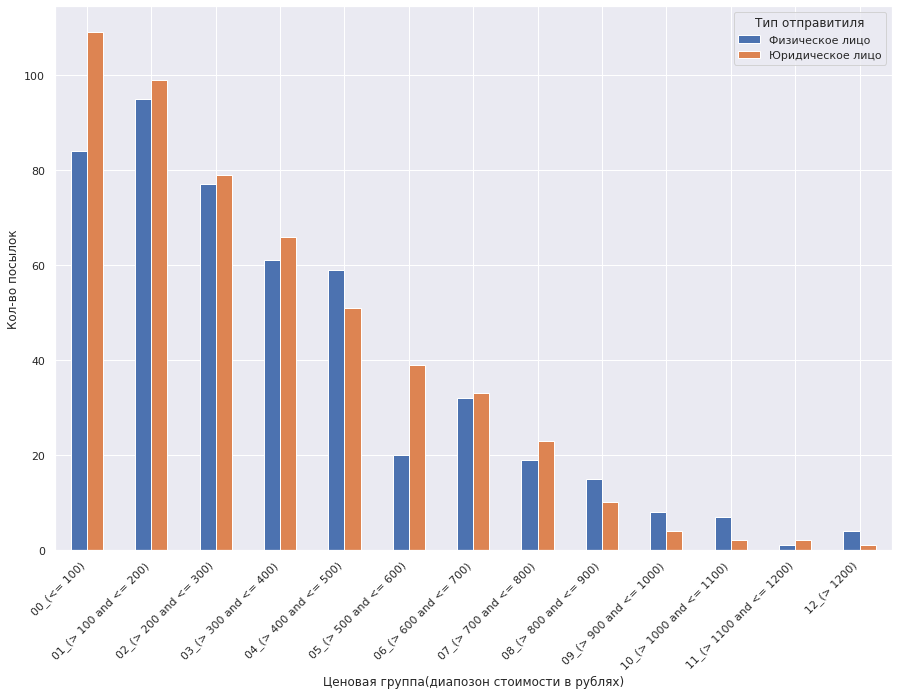

In [ ]:
prices = select(sql)
pt = prices.pivot_table(index='price_group', columns=['client_type'], values='count(parcel_id)')

sns.set()
plt.rcParams["figure.figsize"] = (15,10)
pt.plot(kind='bar')
plt.legend(title='Тип отправитиля')
plt.ylabel('Кол-во посылок')
plt.xlabel('Ценовая группа(диапозон стоимости в рублях)')
plt.xticks(rotation=45, ha='right')
plt.show()

###PANDAS

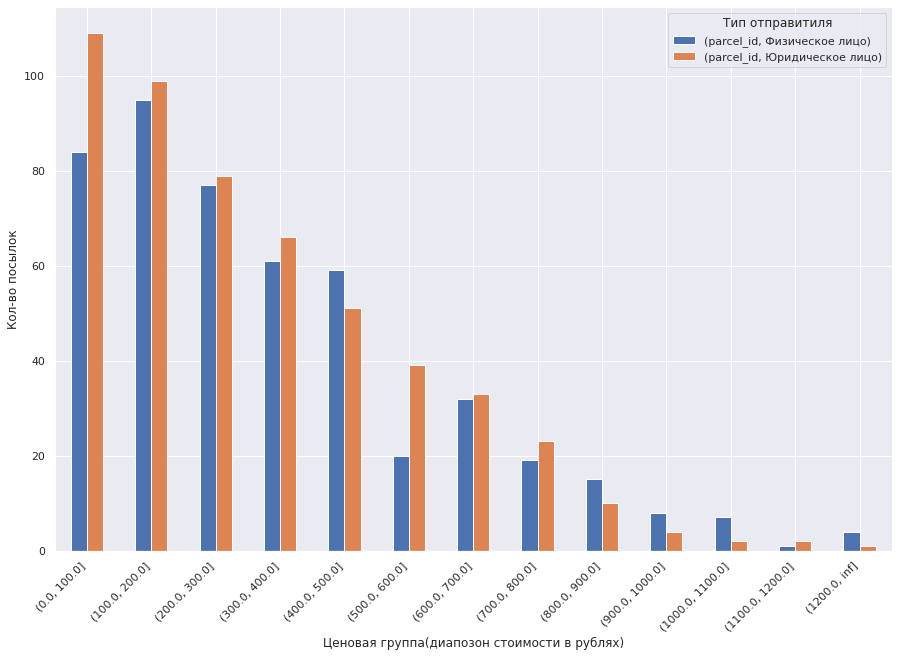

In [ ]:
bins = list(range(0,1300,100))
bins.append(float("inf"))
parcel_aggr['price_group'] = pd.cut(x = parcel_aggr['price']/100, bins = bins)
pt = parcel_aggr.pivot_table(index='price_group', columns=['client_type'], values=['parcel_id'], aggfunc="count")

sns.set()
plt.rcParams["figure.figsize"] = (15,10)
pt.plot(kind='bar')
plt.legend(title='Тип отправитиля')
plt.ylabel('Кол-во посылок')
plt.xlabel('Ценовая группа(диапозон стоимости в рублях)')
plt.xticks(rotation=45, ha='right')
plt.show()